                   Results              
----------------------------------------
     statistic                 value
----------------------------------------
Average spread :              1.48236
        Profit :             64.80896
   Std(Profit) :              6.47501


Text(0.5, 1.0, 'Profit')

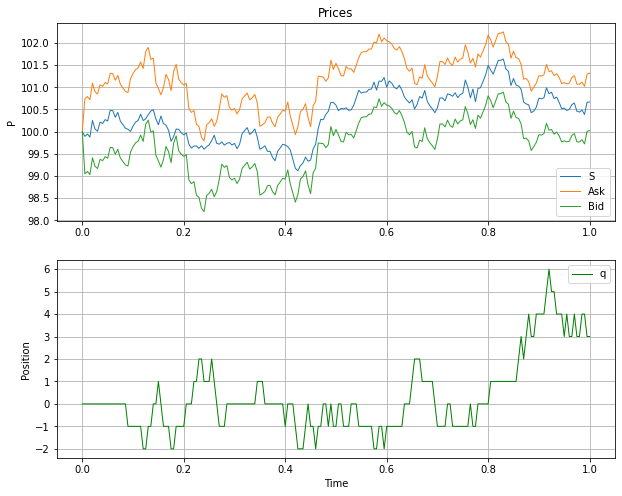

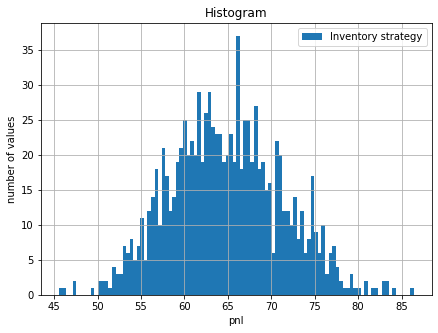

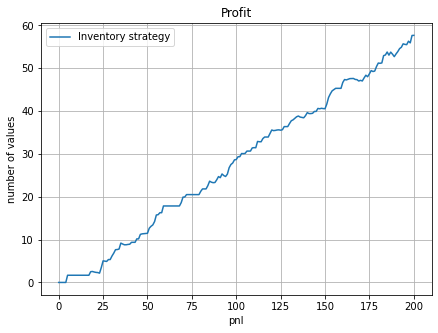

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 12 16:40:52 2017

@author: Marco Dibo

"High-frequency trading in a limit order book"
by Marco Avellaneda and Sasha Stoikov"

"""


## Montecarlo simulation with numpy ##
import math
import numpy as np
import matplotlib.pyplot as plt
import random


#Parameters for mid price simulation:

S0 = 100. #initial price
T = 1.0  #time
sigma = 2 #volatility
M = 200 #number of time steps
dt = T/M #time step
Sim = 1000  #number of simulations
gamma = 0.1 #risk aversion 
k = 1.5
A = 140
I = 1 


#Results:

AverageSpread = []
Profit = []
Std = []

for i in range(1, Sim+1):
    
    ###reservation price:
    ### r(s,t) = s - q * gamma * sigma**2 * (T-t)    
    
    S = np.zeros((M+1,I))
    Bid = np.zeros((M+1,I))
    Ask = np.zeros((M+1,I))
    ReservPrice = np.zeros((M+1,I))
    spread = np.zeros((M+1,I))
    deltaB = np.zeros((M+1,I))
    deltaA = np.zeros((M+1,I))
    q = np.zeros((M+1,I))
    w = np.zeros((M+1,I))
    equity = np.zeros((M+1,I))
    reserve_relation = np.zeros((M+1,I))
    
    
    S[0] = S0
    ReservPrice[0] = S0
    Bid[0] = S0
    Ask[0] = S0
    spread[0] = 0
    deltaB[0] = 0
    deltaA[0] = 0
    q[0] = 0 #position
    w[0] = 0 #wealth
    equity[0] = 0
    
    for t in range(1, M+1):
        z = np.random.standard_normal(I)
        S[t] = S[t-1] + sigma * math.sqrt(dt) * z
        ReservPrice[t] = S[t] - q[t-1] * gamma * (sigma ** 2) * (T - t/float(M)) 
        spread[t] = gamma * (sigma **2) * (T - t/float(M)) + (2/gamma) * math.log(1 + (gamma/k))
        Bid[t] = ReservPrice[t] - spread[t]/2.     
        Ask[t] = ReservPrice[t] + spread[t]/2.     
        
        deltaB[t] = S[t] - Bid[t]     
        deltaA[t] = Ask[t] - S[t]
        
        lambdaA = A * np.exp(-k * deltaA[t])
        ProbA = lambdaA * dt
        fa = random.random()
        
        lambdaB = A * np.exp(-k * deltaB[t])
        ProbB = lambdaB * dt
        fb = random.random()
        
        if ProbB > fb and ProbA < fa :
            q[t] = q[t-1] + 1
            w[t] = w[t-1] - Bid[t]   
            
        if ProbB < fb and ProbA > fa :
            q[t] = q[t-1] - 1
            w[t] = w[t-1] + Ask[t]  
        if ProbB < fb and ProbA < fa :
            q[t] = q[t-1]
            w[t] = w[t-1] 
        if ProbB > fb and ProbA > fa:
            q[t] = q[t-1]
            w[t] = w[t-1] - Bid[t]
            w[t] = w[t] + Ask[t]  
        
        equity[t] = w[t] + q[t] * S[t]
        
    AverageSpread.append(spread.mean())
    Profit.append(equity[-1])
    Std.append(equity[-1])
    
    

print ("                   Results              ")
print ("----------------------------------------")
    
print ("%14s %21s" % ('statistic', 'value'))
print (40 * "-")
print ("%14s %20.5f" % ("Average spread :", np.array(AverageSpread).mean()))
print ("%16s %20.5f" % ("Profit :", np.array(Profit).mean()))
print ("%16s %20.5f" % ("Std(Profit) :", np.array(Std).std()))
    

    
#Plots:

x = np.linspace(0., T, num= (M+1))
    
fig=plt.figure(figsize=(10,8))  
plt.subplot(2,1,1) # number of rows, number of  columns, number of the subplot 
plt.plot(x,S[:], lw = 1., label = 'S')
plt.plot(x,Ask[:], lw = 1., label = 'Ask')
plt.plot(x,Bid[:], lw = 1., label = 'Bid')       
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('P')
plt.title('Prices')
plt.subplot(2,1,2)
plt.plot(x,q[:], 'g', lw = 1., label = 'q') #plot 2 lines
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('Time')
plt.ylabel('Position')


#Histogram of profit:

plt.figure(figsize = (7,5))
plt.hist(np.array(Profit), label = ['Inventory strategy'], bins = 100)
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('pnl')
plt.ylabel('number of values')
plt.title('Histogram')
    

#PNL:

plt.figure(figsize = (7,5))
plt.plot(np.array(equity), label = 'Inventory strategy')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('pnl')
plt.ylabel('number of values')
plt.title('Profit')
    
